# Stochastic simulation 

Examples taken from PyGOM documentation and https://arxiv.org/pdf/1803.06934.pdf (see page 11 for stochastic simulations).

Examples are performed on an SIR model.

$\frac{dS}{dt} = -\beta S I $

$\frac{dI}{dt} = \beta S I - \gamma I$

$\frac{dR}{dt} = \gamma I$

In [1]:
import pygom
import pkg_resources
print('PyGOM version %s' %pkg_resources.get_distribution('pygom').version)

PyGOM version 0.1.3


In [2]:
import matplotlib.pyplot as plt
def simplot(t_sim, y_sim, t_det=None, y_det=None, y_mean=None):
    '''Plot stochastic, average, and deterministic solutions.'''
    
    plt.rcParams['figure.figsize'] = [12, 6]
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    
    # plot simulations
    for i in range(np.shape(y_sim)[0]):
        ax1.plot(t_sim, y_sim[i][:,0])
        ax2.plot(t_sim, y_sim[i][:,1])
        ax3.plot(t_sim, y_sim[i][:,2])
    
    # plot mean of simulations    
    if y_mean is not None:
        ax1.plot(t_sim, y_mean[:,0], linewidth=3,color='k')
        ax2.plot(t_sim, y_mean[:,1], linewidth=3,color='k')
        ax3.plot(t_sim, y_mean[:,2], linewidth=3,color='k', label='mean (%s runs)' %np.shape(y_sim)[0])
    
    # plot deterministic
    if y_det is not None:
        if t_det is None:
            t_det = t_sim
        ax1.plot(t_det, y_det[:,0], linewidth=4, color='k', ls='--')
        ax2.plot(t_det, y_det[:,1], linewidth=4, color='k', ls='--')
        ax3.plot(t_det, y_det[:,2], linewidth=4, color='k', ls='--', label='deterministic')
        
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax1.set_title('Susceptible')
    ax2.set_title('Infected')
    ax3.set_title('Removed')
    ax3.legend()

## Parameter stochasticity
Parameter values are sampled from a distribution. 
Deterministic solutions are found for a given set of parameter values.

In this example, $\beta$ and $\gamma$ are sampled from a gamma distribution.

In [3]:
from pygom import Transition, TransitionType, SimulateOde, DeterministicOde
import numpy as np
from copy import deepcopy

# construct model 
states = ['S', 'I', 'R']
params = ['beta', 'gamma', 'N']
transitions = [Transition(origin='S', destination='I', equation='beta*S*I/N', 
                          transition_type=TransitionType.T),
               Transition(origin='I', destination='R', equation='gamma*I', 
                          transition_type=TransitionType.T)]

model_p = SimulateOde(states, params, transition=transitions)

In [4]:
# initial conditions 
N = 1000 #7781984.0
in_inf = 1 #round(0.0000001*N)
init_state = [N - in_inf, in_inf, 0.0]

# time 
t = np.linspace (0 , 150 , 101)

# deterministic parameter values
param_evals = [('beta', 0.5), ('gamma', 1.0/3.0), ('N', N)]

In [6]:
# define parameter distributions
from pygom.utilR import rgamma

d = dict()
d['beta'] = (rgamma, {'shape':100.0, 'rate':200.0})
d['gamma'] = (rgamma, {'shape':100.0, 'rate':300.0})
d['N'] = N

In [7]:
model_p.parameters = d
model_p.initial_values = (init_state, t[0])

In [8]:
# deterministic model 
model_d = deepcopy(model_p)
model_d.parameters = param_evals

Ydet = model_d.integrate(t[1::])

In [9]:
# solve for 50 parameter sets 
Ymean, Yall = model_p.simulate_param(t[1::], iteration=50, full_output=True)

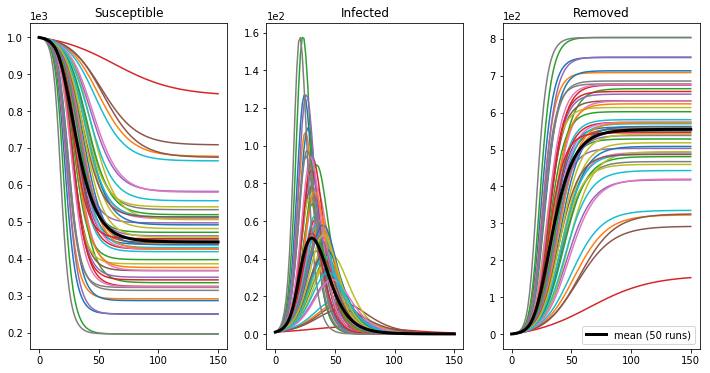

In [10]:
simplot(t, Yall, y_mean=Ymean)

In [11]:
#!TODO Extract values of beta and gamma
#!TODO Plot deterministic model with mean value of beta and gamma
#!TODO Add legend with beta and gamma parameter

## Jump process

Movements between states are discrete, where the probability of transition is given by 

$Pr(process\ j\ jump\ within\ time\ \tau) = \lambda_j \exp^{-\lambda_j \tau}$.

In [12]:
# construct model
model_j = SimulateOde(states, params, transition=transitions)
model_j.parameters = param_evals
model_j.initial_values = (init_state, t[0])

In [13]:
# run 10 simulations
# 
tfew = np.linspace (0 , 150 , 150)
simX, simT = model_j.simulate_jump(tfew[1::], iteration=50, full_output=True)

Parallel simulation
Revert to serial


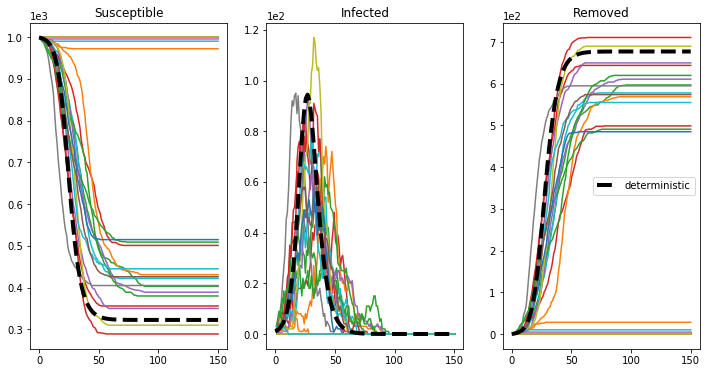

In [14]:
simplot(simT, simX, t_det=t, y_det=Ydet)